<a href="https://colab.research.google.com/github/AycaCicek/Turkcell-MakineOgrenmesi/blob/main/Lasso_Regresyon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV

In [3]:
data=pd.read_csv("/content/Hitters.csv")
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
data=data.dropna()
data_encoding=pd.get_dummies(data[["League","Division","NewLeague"]])

y = data["Salary"]#Bağımlı değişken 
##BAĞIMSIZ DEĞİŞKEN SEÇİMİ##
X_=data.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,data_encoding[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [5]:
lasso_model=Lasso().fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.257e+06, tolerance: 3.899e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [6]:
lasso_model

Lasso()

In [7]:
lasso_model.intercept_

-5.587450677336506

In [8]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [10]:
#farklı lambda değerlerine karşılık gelen katsayılar

In [13]:
lasso=Lasso()
coefs=[]
alphas=np.random.randint(0,100000,100)
for a in alphas:
  lasso.set_params(alpha=a)
  lasso.fit(X_train,y_train)
  coefs.append(lasso.coef_)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.151e+06, tolerance: 3.899e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.224e+06, tolerance: 3.899e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


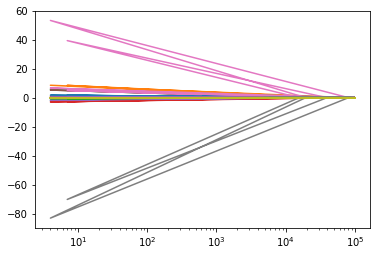

In [15]:
ax=plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")#elimizdeki farklı lambdalara karşın parametre değerleri

In [17]:
lasso=Lasso()
coefs=[]
alphas=10**np.linspace(10,-2,100)*0.5
for a in alphas:
  lasso.set_params(alpha=a)
  lasso.fit(X_train,y_train)
  coefs.append(lasso.coef_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.470e+03, tolerance: 3.899e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.540e+03, tolerance: 3.899e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

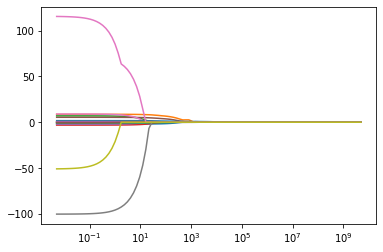

In [18]:
ax=plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")

Tahmin

In [19]:
lasso_model.predict(X_train[0:5])

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [20]:
lasso_model.predict(X_test[0:5])

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [22]:
y_pred=lasso_model.predict(X_test)

In [23]:
np.sqrt(mean_squared_error(y_test,y_pred))

356.0975884554034

In [24]:
r2_score(y_test,y_pred)

0.41422798132366156

Model Tuning

In [25]:
lasso_cv_model=LassoCV(cv=10,max_iter=100000).fit(X_train,y_train)#max iterasyon

In [26]:
lasso_cv_model.alpha_

563.4670501833854

In [31]:
lasso_tuned=Lasso().set_params(alpha=lasso_cv_model.alpha_,).fit(X_train,y_train)

In [29]:
y_pred=lasso_tuned.predict(X_test)

In [30]:
np.sqrt(mean_squared_error(y_test,y_pred))

373.5957225069795

In [37]:
lasso_cv_model=LassoCV(alphas=alphas,cv=10,max_iter=100000).fit(X_train,y_train)

In [38]:
lasso_cv_model.alpha_

201.85086292982749

In [36]:
lasso_tuned=Lasso().set_params(alpha=lasso_cv_model.alpha_,).fit(X_train,y_train)

In [39]:
y_pred=lasso_tuned.predict(X_test)

In [40]:
np.sqrt(mean_squared_error(y_test,y_pred))

363.6832708037447

In [41]:
pd.Series(lasso_tuned.coef_,index=X_train.columns)

AtBat         -1.052276
Hits           5.342648
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          2.640006
Years          0.000000
CAtBat        -0.174125
CHits          0.249805
CHmRun        -0.000000
CRuns          1.035075
CRBI           0.469281
CWalks        -0.186771
PutOuts        0.272541
Assists        0.170528
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64